### Mulubrhan Gebrekidan 


### Detecting Autism in Toddlers Using Machine Learning 

### Background

Autism Spectrum Disorder is a disability that is caused by differences in the brain which is expressed by behaving, interacting, and communicating in different ways. It has its own unique strength and also might pause difficulties in a person requiring intervention. According to CDC formal diagnosis doesn’t happen early and wait time is sometimes a year long. However, early intervention is critical. Understanding what traits to look for associated with Autism is tremendously helpful for parents and health practitioners. While waiting for the formal diagnostic, by using these attributes, more attention and personalized help can be tailored for the individual. This project uses a data mining model to classify attributes related to Autism.
 The data used is the Kaggle dataset, which is collected from a mobile app where respondents answer a set of 10 questions. The answer to the question was then converted to 1 and 0. The ten questions included are,
1.	Does your child look at you when you call his/her name?
2.	How easy is it for you to get eye contact with your child?
3.	Does your child point to indicate that s/he wants something? (e.g. a toy that is out of reach)
4.	Does your child point to share interest with you? (e.g. pointing at an interesting sight)
5.	Does your child pretend? (e.g. care for dolls, talk on a toy phone)
6.	Does your child follow where you’re looking?
7.	If you or someone else in the family is visibly upset, does your child show signs of wanting to comfort them? (e.g. stroking hair, hugging them)
8.	Would you describe your child’s first words as:
9.	Does your child use simple gestures? (e.g. wave goodbye) 
10.	10, Does your child stare at nothing with no apparent purpose?


### EDA

In [1]:
import pandas as pd
df= pd.read_csv("Toddler Autism dataset July 2018.csv")

In [2]:
# Checking first rows
df.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [3]:
df.shape

(1054, 19)

### Visualization

In [4]:
import matplotlib.pyplot as plt

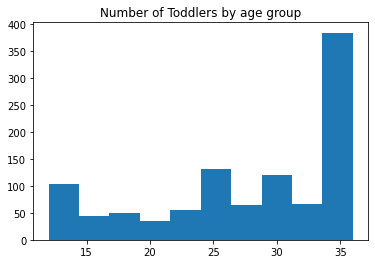

In [5]:
plt.hist(df["Age_Mons"],bins=10)
plt.title("Number of Toddlers by age group")
plt.show()


The histogram shows most of the response is for children at around one year 2 years and the highest number at about 3 year.

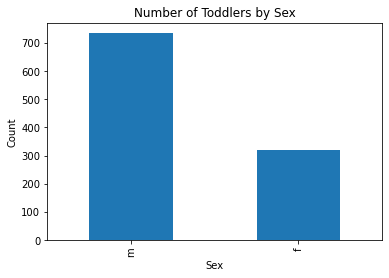

In [6]:
freq = df['Sex'].value_counts()
freq.plot(kind='bar', title='Number of Toddlers by Sex', xlabel='Sex', ylabel='Count')
plt.show()

The data have twice as many values for male children compared to females.

<AxesSubplot:ylabel='None'>

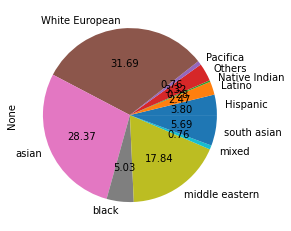

In [7]:
df.groupby('Ethnicity').size().plot(kind='pie', autopct='%.2f')

The majority of the participants ethnicity was White Europeans, Asians and Middle Eastern

Correlation 

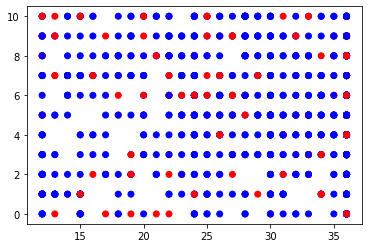

In [8]:
colors={'yes':'red', 'no':'blue'}
plt.scatter(df["Age_Mons"], df["Qchat-10-Score"], c=df["Family_mem_with_ASD"].map(colors))

The chart shows the distribution of age and the total number of yes answer for the question colored that indicates if Autism exist in family history 

Observation 

The preliminary data exploration shows that the sample has more male participants than females. Also, there is a difference in sample size based on which ethnicity participates. The data has some categorical values that will need to be converted to numberic for data modeling.

## Data Preparation

 Dropping features

In [9]:
# Dropping Case_no and Qchat-10 Score
df2 = df.drop(['Case_No','Qchat-10-Score'],axis=1)
df2.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,0,0,0,0,0,0,1,1,0,1,28,f,middle eastern,yes,no,family member,No
1,1,1,0,0,0,1,1,0,0,0,36,m,White European,yes,no,family member,Yes
2,1,0,0,0,0,0,1,1,0,1,36,m,middle eastern,yes,no,family member,Yes
3,1,1,1,1,1,1,1,1,1,1,24,m,Hispanic,no,no,family member,Yes
4,1,1,0,1,1,1,1,1,1,1,20,f,White European,no,yes,family member,Yes


Data extraction/selection 

In [10]:
# Checking the entry for who completed the test
df2['Who completed the test'].unique()

array(['family member', 'Health Care Professional',
       'Health care professional', 'Self', 'Others'], dtype=object)

The result shows Health Care Professional value appear twice.

In [11]:
# Standardize values
df2['Who completed the test'].replace('Health Care Professional',\
                             'Health care professional', inplace=True)
#Checking Unique values again 
df2['Who completed the test'].unique()

array(['family member', 'Health care professional', 'Self', 'Others'],
      dtype=object)

I will use the data that was completed by family memeber or Health care professionals

In [12]:
# Selecting dataframe set based on who completed the test
df3= df2.loc[df2['Who completed the test'].\
             isin(['family member', 'Health care professional'])]
# Checking the size
df3.shape

(1047, 17)

Engineer new useful features.

The age of the toddlers range from 12 month  to 36 month. Creating a feature that shows if a todler is above or below two years old can help the model.

In [13]:
df3['Age_Mons'].value_counts()

36    316
24     69
12     67
30     66
28     42
26     36
33     36
34     34
15     31
31     30
35     30
32     30
23     28
22     27
25     26
29     24
27     23
19     21
20     21
14     18
13     18
18     16
21     13
16     13
17     12
Name: Age_Mons, dtype: int64

In [14]:
import numpy as np

In [15]:
# Creating new column based on age mont
df3['age_above_below_2year'] = np.where(df3['Age_Mons'] > 24,\
                                'above_2yr', 'below_2yr')

df3['age_above_below_2year'].value_counts()

C:\Users\muluf\AppData\Local\Temp\ipykernel_21596\2755740052.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['age_above_below_2year'] = np.where(df3['Age_Mons'] > 24,\


above_2yr    693
below_2yr    354
Name: age_above_below_2year, dtype: int64

The new column shows most of the toddlers are above 2 years old

Deal with missing Values

In [16]:
# Checking for missing values
df3.isnull().sum()

A1                        0
A2                        0
A3                        0
A4                        0
A5                        0
A6                        0
A7                        0
A8                        0
A9                        0
A10                       0
Age_Mons                  0
Sex                       0
Ethnicity                 0
Jaundice                  0
Family_mem_with_ASD       0
Who completed the test    0
Class/ASD Traits          0
age_above_below_2year     0
dtype: int64

The data do not have any missing values

Creating Dummy Variables

In [17]:
# Checking the data type 
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1047 entries, 0 to 1053
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   A1                      1047 non-null   int64 
 1   A2                      1047 non-null   int64 
 2   A3                      1047 non-null   int64 
 3   A4                      1047 non-null   int64 
 4   A5                      1047 non-null   int64 
 5   A6                      1047 non-null   int64 
 6   A7                      1047 non-null   int64 
 7   A8                      1047 non-null   int64 
 8   A9                      1047 non-null   int64 
 9   A10                     1047 non-null   int64 
 10  Age_Mons                1047 non-null   int64 
 11  Sex                     1047 non-null   object
 12  Ethnicity               1047 non-null   object
 13  Jaundice                1047 non-null   object
 14  Family_mem_with_ASD     1047 non-null   object
 15  Who 

I will create a dummy varibles for all columns that have object data type

In [18]:
df3 = pd.get_dummies(data=df3,
         columns=["Sex", "Ethnicity","Jaundice",\
                  "Family_mem_with_ASD","Who completed the test",\
                  "Class/ASD Traits ","age_above_below_2year"])

# Checking cleaned data 
df3.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,Jaundice_no,Jaundice_yes,Family_mem_with_ASD_no,Family_mem_with_ASD_yes,Who completed the test_Health care professional,Who completed the test_family member,Class/ASD Traits _No,Class/ASD Traits _Yes,age_above_below_2year_above_2yr,age_above_below_2year_below_2yr
0,0,0,0,0,0,0,1,1,0,1,...,0,1,1,0,0,1,1,0,1,0
1,1,1,0,0,0,1,1,0,0,0,...,0,1,1,0,0,1,0,1,1,0
2,1,0,0,0,0,0,1,1,0,1,...,0,1,1,0,0,1,0,1,1,0
3,1,1,1,1,1,1,1,1,1,1,...,1,0,1,0,0,1,0,1,0,1
4,1,1,0,1,1,1,1,1,1,1,...,1,0,0,1,0,1,0,1,0,1


In [19]:
# Size for cleaned data 
df3.shape

(1047, 34)

## Model Building and Evaluation 

In [20]:
# Setting the target and the features
target = df3['Class/ASD Traits _Yes']
# In feature I will exclude both Class/ASD Traits columns
features = df3.drop(columns =['Class/ASD Traits _Yes',\
                              'Class/ASD Traits _No'])


In [21]:
# Splitting data to test and train
# Loading library 
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split\
(features, target, test_size = 0.2, random_state=10)

In [22]:
# Checking size
print("Train Size: " + str(x_train.shape))
print("Test Size: " + str(x_test.shape))

Train Size: (837, 32)
Test Size: (210, 32)


In [23]:
# Applying Standardazation 
from sklearn.preprocessing import LabelEncoder, StandardScaler
scaler = StandardScaler()
# Applyign scaling and transormation on the train set
x_train = scaler.fit_transform(x_train)
#Transforming the test set
x_test = scaler.transform(x_test)

In [24]:
# Model
# Using Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [25]:
# Fitting model
model.fit(x_train, y_train)

LogisticRegression()

In [26]:
# Predicting 
y_pred = model.predict(x_test)

In [27]:
# Evaluation 
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay, \
accuracy_score, roc_auc_score

In [28]:
# Getting the confusion metrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 61   1]
 [  0 148]]


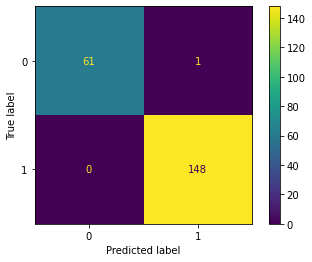

In [29]:
# Visualizing Confusion Matrix
ConfusionMatrixDisplay(cm).plot()

In [30]:
# Getting Accuracy
model_accuracy=accuracy_score(y_test,y_pred)
model_auc = roc_auc_score(y_test, y_pred)
print("Accuracy: "+ str(model_accuracy))
print("AUC: "+ str(model_auc))

Accuracy: 0.9952380952380953
AUC: 0.9919354838709677


In [31]:
# Getting the F1 score, Precision and recalls 
import sklearn.metrics as metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        62
           1       0.99      1.00      1.00       148

    accuracy                           1.00       210
   macro avg       1.00      0.99      0.99       210
weighted avg       1.00      1.00      1.00       210



### Evaluation/ Recomendation 

This research aimed to predict the category of Autism traits based on answers to different factors. Since this classification has only two possible outcomes, a logistic regression model was used. The model results with high accuracy with a score of 99.5%. The confusion matrix also shows the model only has only one False Positive. I plan to test the model further for overfitting and adjusting for data size imbalance for the different categories..

### Additional Details Added Since Last Milestone 

In [34]:
# Updates Change made
# Dropping the question Columns from the features set 

# Setting the target and the features
target2 = df3['Class/ASD Traits _Yes']
# In feature I will exclude both Class/ASD Traits columns
features2 = df3.drop(columns =['Class/ASD Traits _Yes',\
                              'Class/ASD Traits _No','A1','A2','A3',\
                               'A4','A5','A6','A7','A8','A9','A10'])


In [45]:
## Splitting data to test and train again 
x_train2, x_test2, y_train2, y_test2 = train_test_split\
(features2, target2, test_size = 0.2, random_state=10)

In [46]:
# Checking size
print("Train Size: " + str(x_train2.shape))
print("Test Size: " + str(x_test2.shape))

Train Size: (837, 22)
Test Size: (210, 22)


In [47]:
# Applying Standardazation 
scaler = StandardScaler()
# Applyign scaling and transormation on the train set
x_train2 = scaler.fit_transform(x_train2)
#Transforming the test set
x_test2 = scaler.transform(x_test2)

In [48]:
# logistic regression will be used again
mode2 = LogisticRegression()

In [49]:
# Fitting model
model.fit(x_train2, y_train2)

LogisticRegression()

In [50]:
# Predicting 
y_pred2 = model.predict(x_test2)

In [51]:
# Getting the confusion metrix
cm2= confusion_matrix(y_test2, y_pred2)
print(cm2)

[[ 12  50]
 [ 16 132]]


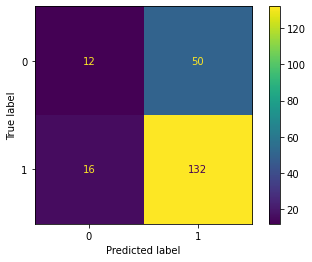

In [52]:
# Visualizing Confusion Matrix
ConfusionMatrixDisplay(cm2).plot()

In [53]:
# Getting Accuracy
model_accuracy2=accuracy_score(y_test2,y_pred2)
model_auc2 = roc_auc_score(y_test2, y_pred2)
print("Accuracy: "+ str(model_accuracy2))
print("AUC: "+ str(model_auc2))

Accuracy: 0.6857142857142857
AUC: 0.5427201394943331


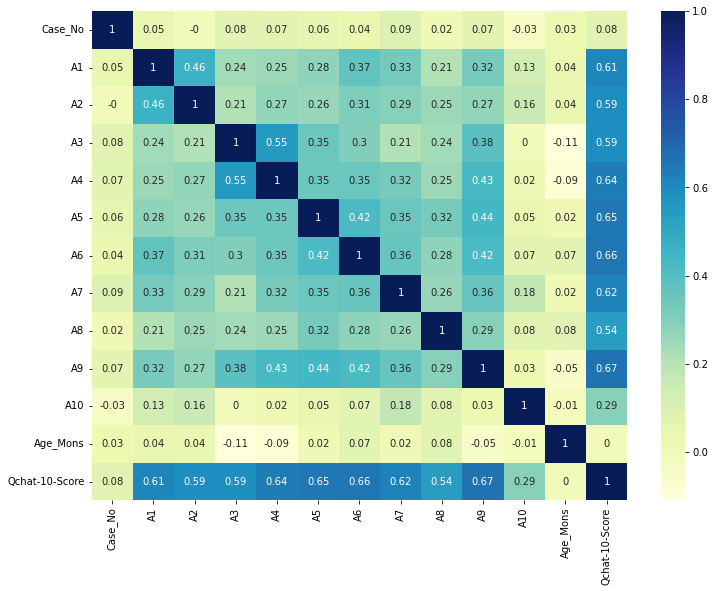

In [58]:
# Added to show correlation  
import seaborn as sns
plt.figure(figsize=(12, 9));
correlation_matrix = df.corr().round(2);
sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True);